In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer

## Importing Data

In [23]:
# Import Data
train_data = pd.read_csv("./spaceship-titanic/train.csv")
test_data = pd.read_csv("./spaceship-titanic/test.csv")
sample_output = pd.read_csv("./spaceship-titanic/sample_submission.csv")

In [24]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Missing Data Analysis

<Axes: >

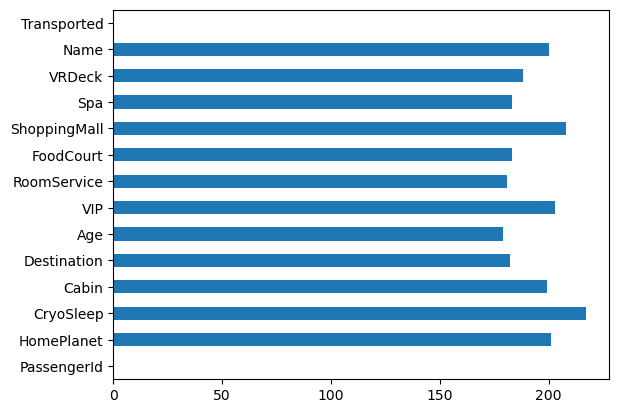

In [25]:
train_data.isna().sum().plot(kind='barh')

In [26]:
missing_values_percent = 100 * train_data.isnull().sum() / len(train_data)
print("\nPercentage of missing values per column:")
print(missing_values_percent)


Percentage of missing values per column:
PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


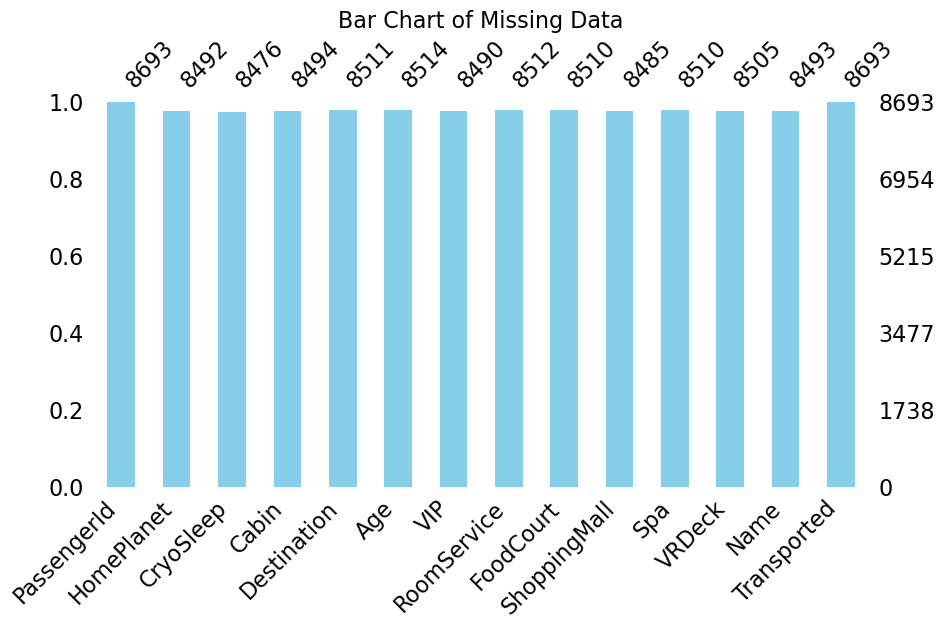

In [30]:
# Visualize missing data patterns
# Bar chart of missing values
msno.bar(train_data, color='skyblue', figsize=(10,5))
plt.title('Bar Chart of Missing Data', fontsize=16)
plt.show()

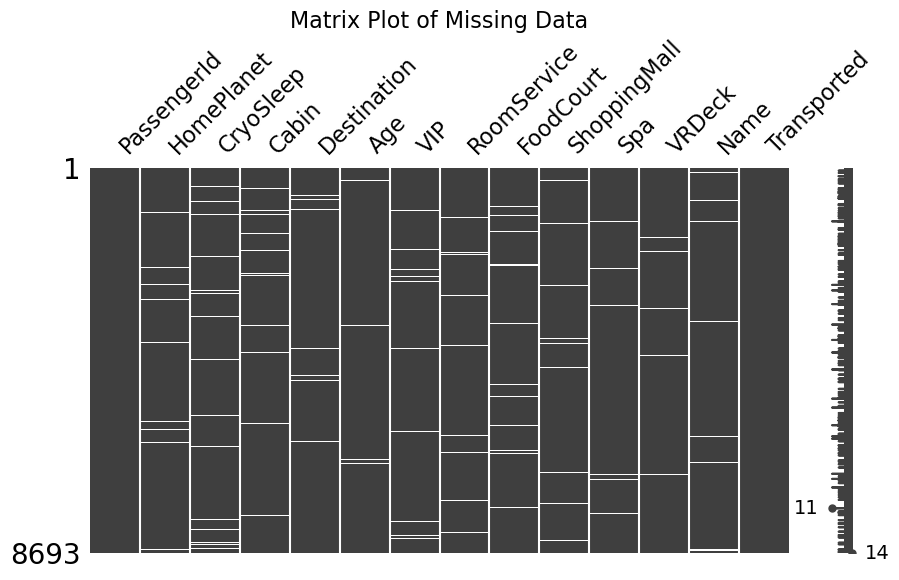

In [28]:
# Matrix plot to visualize the location and pattern of missing values
msno.matrix(train_data, figsize=(10, 5))
plt.title('Matrix Plot of Missing Data', fontsize=16)
plt.show()


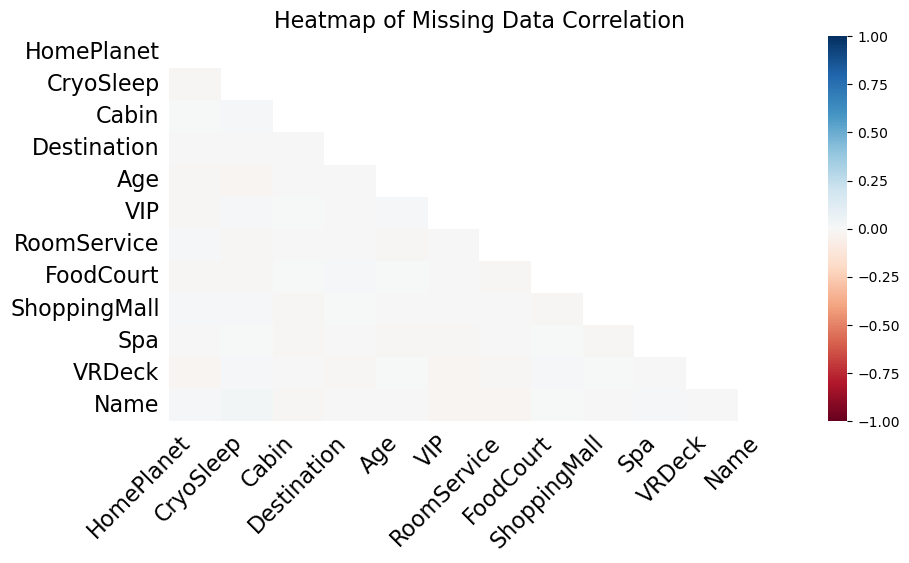

In [32]:
msno.heatmap(train_data, figsize=(10, 5))
plt.title('Heatmap of Missing Data Correlation', fontsize=16)
plt.show()

- No Correlation between missing values, each columns' missing values seem to be independent from the other
- It doesn't feel worth to drop a row, for just having 1 or 2 missing columns. Best to impute or use these missing values as features. 

## EDA (Numerical Values)

In [33]:
train_data_no_null = train_data.dropna()

In [36]:
train_data_no_null['CryoSleep'] = train_data_no_null['CryoSleep'].astype(int)

C:\Users\ryan_\AppData\Local\Temp\ipykernel_32312\2795691191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_no_null['CryoSleep'] = train_data_no_null['CryoSleep'].astype(int)


In [37]:
train_data_no_null['VIP'] = train_data_no_null['VIP'].astype(int)

C:\Users\ryan_\AppData\Local\Temp\ipykernel_32312\747070923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_no_null['VIP'] = train_data_no_null['VIP'].astype(int)


In [38]:
train_numerical = train_data_no_null[['CryoSleep', 'VIP','ShoppingMall', 'RoomService', 'FoodCourt', 'VRDeck', 'Age', 'Transported']]

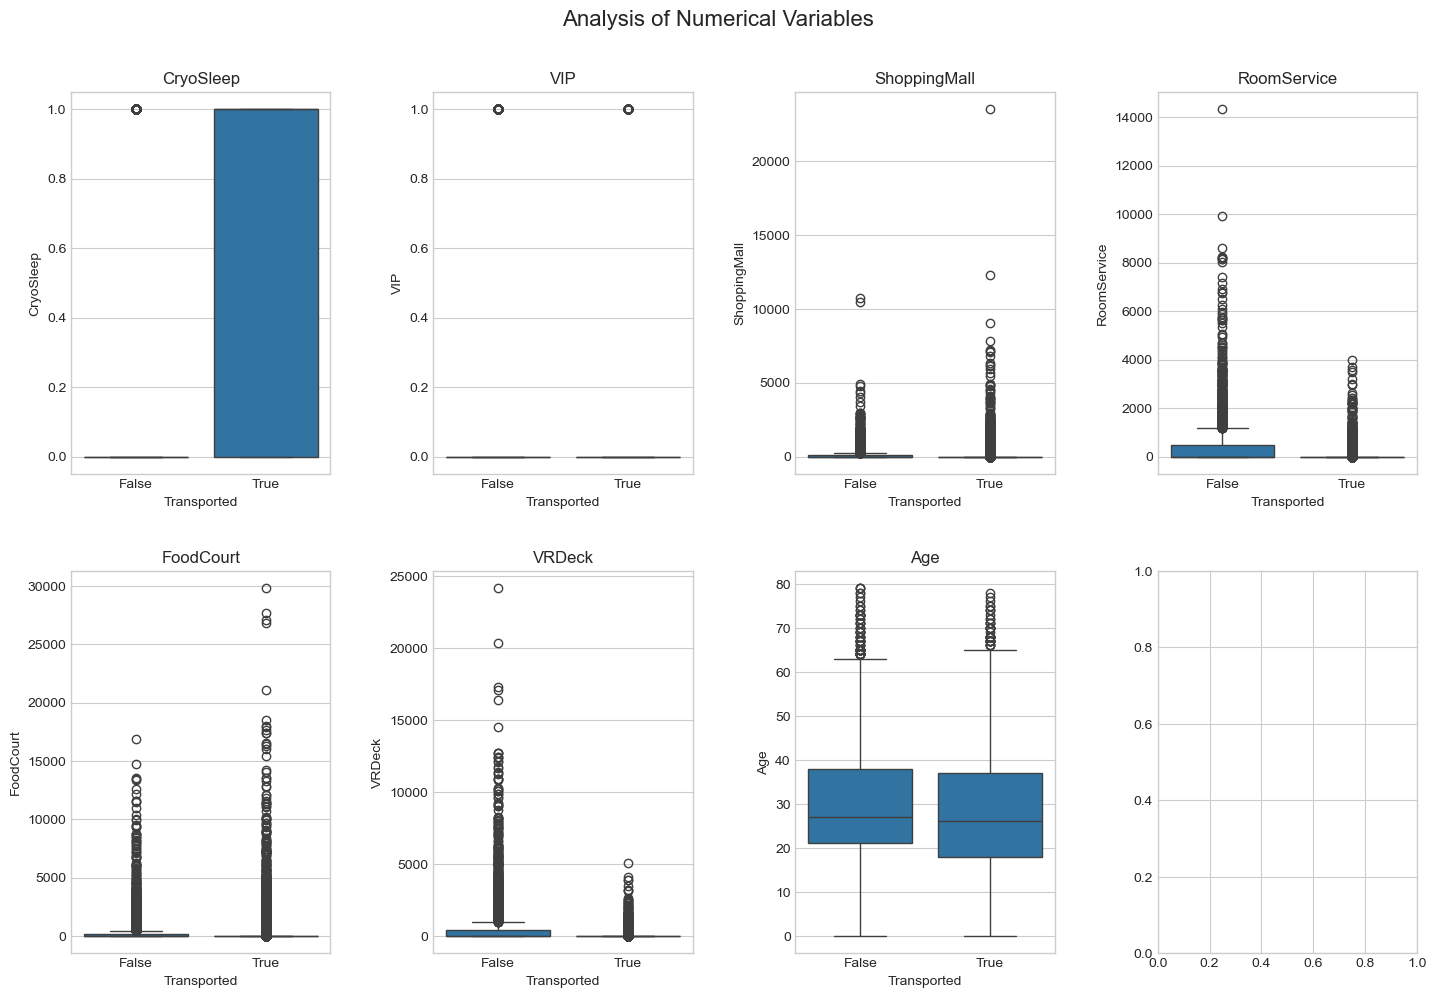

In [49]:
# 2. Set the overall plot style for a clean look
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid') # You can try different styles

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))


axes_flat = axes.flatten()

for idx, col in enumerate(['CryoSleep', 'VIP','ShoppingMall', 'RoomService', 'FoodCourt', 'VRDeck', 'Age']):
    sns.boxplot(data=train_data, x='Transported', y=col,  ax=axes_flat[idx])
    axes_flat[idx].set_title(col)

plt.tight_layout(pad=3.0)

# 7. Add an overall title for the entire figure
fig.suptitle('Analysis of Numerical Variables', fontsize=16, y=1.02) # y adjusts the title position

# 8. Display the combined plot
plt.show()

## Categorical Values

In [ ]:
- **Features**
    - Same Cabin (Identical Cabin)
    - Name extract last name (Family)


In [78]:
# Home Planet
gg = train_data['HomePlanet'].fillna('missing_planet')

gg=pd.get_dummies(gg, drop_first=True)

train_data1 = pd.concat([train_data.reset_index(drop=True), gg.reset_index(drop=True)], axis=1)

In [79]:
# Cryo Sleep

# Home Planet
gg = train_data1['CryoSleep'].fillna('missing_cryo')

gg=pd.get_dummies(gg, drop_first=True)

train_data1 = pd.concat([train_data1.reset_index(drop=True), gg.reset_index(drop=True)], axis=1)

In [81]:
# Destination

gg = train_data1['Destination'].fillna('missing_destination')

gg=pd.get_dummies(gg, drop_first=True)

train_data1 = pd.concat([train_data1.reset_index(drop=True), gg.reset_index(drop=True)], axis=1)

In [134]:
train_data1.isna().sum()

PassengerId              0
HomePlanet             201
CryoSleep              217
Cabin                  199
Destination            182
Age                    179
VIP                    203
RoomService            181
FoodCourt              183
ShoppingMall           208
Spa                    183
VRDeck                 188
Name                   200
Transported              0
Europa                   0
Mars                     0
missing_planet           0
True                     0
missing_cryo             0
PSO J318.5-22            0
TRAPPIST-1e              0
missing_destination      0
Missing Name             0
firstname                0
lastname                 0
dtype: int64

In [ ]:
# Same Name
# Family


In [94]:
train_data1['Missing Name'] = train_data1['Name'].apply(lambda x: 0 if pd.notnull(x) else 1)

In [95]:
name_dict = {}

In [ ]:
train_data1

In [123]:
temp_df_first_names = train_data1['Name'].dropna().apply(lambda x: x.split(" ")[0]).value_counts()
temp_df_last_names = train_data1['Name'].dropna().apply(lambda x: x.split(" ")[1]).value_counts()

In [124]:
same_last_name_dict = {row['Name']:row['count'] - 1 for idx, row in temp_df_last_names.reset_index().iterrows()}
same_first_name_dict = {row['Name']:row['count'] - 1 for idx, row in temp_df_first_names.reset_index().iterrows()}


In [132]:
train_data1['lastname'] = train_data1['Name'].apply(lambda x: same_last_name_dict[x.split(' ')[1]] if not pd.isna(x) else 0 )

In [133]:
train_data1['firstname'] = train_data1['Name'].apply(lambda x: same_first_name_dict[x.split(' ')[0]] if not pd.isna(x) else 0 )

In [135]:
train_data1.columns

Index([        'PassengerId',          'HomePlanet',           'CryoSleep',
                     'Cabin',         'Destination',                 'Age',
                       'VIP',         'RoomService',           'FoodCourt',
              'ShoppingMall',                 'Spa',              'VRDeck',
                      'Name',         'Transported',              'Europa',
                      'Mars',      'missing_planet',                  True,
              'missing_cryo',       'PSO J318.5-22',         'TRAPPIST-1e',
       'missing_destination',        'Missing Name',           'firstname',
                  'lastname'],
      dtype='object')

In [138]:
# cabin
train_data1['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [ ]:
train_data1

In [ ]:
get first letter, get number get last digit. 

In [ ]:
  'PassengerId',        
                     'Cabin',         'Destination',                 'Age',
                       'VIP',         'RoomService',           'FoodCourt',
              'ShoppingMall',                 'Spa',              'VRDeck',
                      'Name',         'Transported',              'Europa',
                      'Mars',      'missing_planet',                  True,
              'missing_cryo',       'PSO J318.5-22',         'TRAPPIST-1e',
       'missing_destination',        'Missing Name',           'firstname',
                  'lastname'

In [109]:
{row }

AttributeError: 'Series' object has no attribute 'iterrows'

In [84]:
# Name
from thefuzz import process

In [ ]:
def find_match(name, name_list, threshold=85):
    matches = process.extract(name, name_list)
    

In [ ]:
from thefuzz import process
import pandas as pd

# 1. Create a sample DataFrame of people's names and other data
data = {
    'PersonID': range(1, 11),
    'Name': [
        'John Smith',
        'Jonathan Smith',
        'Jenifer Smitt',  # Mispelling
        'Jane Smyth',
        'Robert Williams',
        'Rob Williams',   # Nickname
        'William Jones',
        'Will Jones',     # Nickname
        'Sara Connor',
        'Sarah Connor'    # Mispelling
    ],
    'Age': [35, 36, 32, 38, 45, 46, 50, 51, 28, 29]
}
df = pd.DataFrame(data)

print("--- Original DataFrame ---")
print(df)
print("-" * 30)

# 2. Define the fuzzy matching function
def find_potential_family(name_to_match, names_list, threshold=85):
    """
    Finds names in a list that are a fuzzy match to a given name.

    Args:
        name_to_match (str): The name to search for.
        names_list (list): The list of names to search within.
        threshold (int): The similarity score threshold (0-100).

    Returns:
        list: A list of tuples containing (matched_name, score)
              for names above the threshold.
    """
    # The `process.extract()` function is highly efficient for this task.
    # It returns a list of tuples: (matched_string, score, index_of_matched_string)
    matches = process.extract(name_to_match, names_list)
    
    potential_matches = []
    for match in matches:
        matched_name, score, index = match
        # Ensure we don't return the exact same name as the query
        if score >= threshold and matched_name != name_to_match:
            potential_matches.append((matched_name, score))
            
    return potential_matches

# 3. Iterate through the names and find potential matches
# We will create a dictionary to store the results.
family_groups = {}
processed_names = set()

# Iterate through each name in the DataFrame
for index, row in df.iterrows():
    name = row['Name']
    
    # Avoid processing names we've already found a match for
    if name in processed_names:
        continue
    
    # Get all other names from the DataFrame to compare against
    other_names = df['Name'].loc[df['Name'] != name].tolist()
    
    # Find fuzzy matches
    matches = find_potential_family(name, other_names)
    
    if matches:
        # A match was found, so we create a new group.
        group_id = len(family_groups) + 1
        family_groups[group_id] = [name]
        family_groups[group_id].extend([match[0] for match in matches])
        
        # Add all names in the new group to the processed set
        # This prevents double-counting or re-processing
        for family_member in family_groups[group_id]:
            processed_names.add(family_member)
            
# 4. Print the identified family groups
print("--- Potential Family Groups Found ---")
if not family_groups:
    print("No family groups found based on the threshold.")
else:
    for group_id, members in family_groups.items():
        print(f"Group {group_id}: {', '.join(members)}")

# You can now analyze or use these groups for further processing
# For example, to find all data for a specific group:
print("\n--- Data for Group 1 ---")
group1_names = family_groups[1]
group1_data = df[df['Name'].isin(group1_names)]
print(group1_data)

In [ ]:
pd.get_dummies(train_data, )

In [50]:
train_data_no_null

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CryoSleepInt,VIPInt
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,1
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,0


In [57]:
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
import pandas as pd

# Create a sample DataFrame with categorical data
data = {
    'UserID': range(1, 6),
    'City': ['New York', 'London', 'Tokyo', 'New York', 'London'],
    'Rating': ['Good', 'Excellent', 'Fair', 'Good', 'Excellent']
}
df = pd.DataFrame(data)

print("--- Original DataFrame ---")
print(df)
print("-" * 30)

# --- Using pd.get_dummies() ---
# This will create a new column for each unique value in 'City' and 'Rating'.
dummy_df = pd.get_dummies(df, columns=['City', 'Rating'])

print("\n--- DataFrame after pd.get_dummies() ---")
print(dummy_df)
print("-" * 30)

# The 'drop_first=True' parameter avoids multicollinearity
# It drops one of the dummy columns, as the remaining columns already contain
# all the information (e.g., if 'City_London' and 'City_Tokyo' are both 0, the city must be 'New York').
dummy_df_drop = pd.get_dummies(df, columns=['City', 'Rating'], drop_first=True)

print("\n--- DataFrame with 'drop_first=True' ---")
print(dummy_df_drop)
print("-" * 30)

In [ ]:
import pandas as pd

# Create a sample DataFrame with categorical data
data = {
    'UserID': range(1, 6),
    'City': ['New York', 'London', 'Tokyo', 'New York', 'London'],
    'Rating': ['Good', 'Excellent', 'Fair', 'Good', 'Excellent']
}
df = pd.DataFrame(data)

print("--- Original DataFrame ---")
print(df)
print("-" * 30)

# --- Using pd.get_dummies() ---
# This will create a new column for each unique value in 'City' and 'Rating'.
dummy_df = pd.get_dummies(df, columns=['City', 'Rating'])

print("\n--- DataFrame after pd.get_dummies() ---")
print(dummy_df)
print("-" * 30)

# The 'drop_first=True' parameter avoids multicollinearity
# It drops one of the dummy columns, as the remaining columns already contain
# all the information (e.g., if 'City_London' and 'City_Tokyo' are both 0, the city must be 'New York').
dummy_df_drop = pd.get_dummies(df, columns=['City', 'Rating'], drop_first=True)

print("\n--- DataFrame with 'drop_first=True' ---")
print(dummy_df_drop)
print("-" * 30)

In [ ]:
df_clean = df.drop(columns=['City', 'Rating', 'UserID'])

print("\n--- Original DataFrame with Categorical Columns Dropped ---")
print(df_clean)
print("-" * 30)


# 4. Merge the dummy variables back into the cleaned DataFrame
# Use `pd.concat` to merge along the columns (axis=1).
# We'll reset the index of each DataFrame to make sure they align correctly.
final_df = pd.concat([df_clean.reset_index(drop=True), dummy_df.reset_index(drop=True)], axis=1)

print("\n--- Final Merged DataFrame ---")
print(final_df)
print("-" * 30)

In [51]:
train_data_no_null['Destination'].value_counts()

Destination
TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: count, dtype: int64

In [52]:
train_data_no_null['HomePlanet'].value_counts()

HomePlanet
Earth     3566
Europa    1673
Mars      1367
Name: count, dtype: int64

In [53]:
train_data_no_null['Cabin'].value_counts()

Cabin
G/1476/S    7
E/13/S      7
C/137/S     7
G/734/S     7
B/11/S      7
           ..
E/233/S     1
E/209/P     1
G/548/S     1
D/108/P     1
B/153/P     1
Name: count, Length: 5305, dtype: int64

In [55]:
train_data_no_null['Name']

array(['Maham Ofracculy', 'Juanna Vines', 'Altark Susent', ...,
       'Fayey Connon', 'Celeon Hontichre', 'Propsh Hontichre'],
      shape=(6590,), dtype=object)